# Filtering list of Low electricity

Create a list of building ideas to remove

In [2]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

gc.collect()

4

0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'

In [3]:
combDF = pd.read_csv("../data/combDF.csv")
combDF['timestamp'] = pd.to_datetime(combDF.timestamp)
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [4]:
combDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             int64         
 1   building_id         int64         
 2   primary_use         object        
 3   square_feet         int64         
 4   year_built          float64       
 5   floor_count         float64       
 6   meter               int64         
 7   timestamp           datetime64[ns]
 8   meter_reading       float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  hour                int64         
 17  weekday             int64         
 18  month               int64         
dtypes: datetime64[ns](1), float64(10), int64

In [5]:
len(combDF[combDF['meter_reading'] <= 0])

1867887

In [6]:
len(combDF[combDF['meter_reading'] < 0])/len(combDF.index)

0.0

In [7]:
len(combDF[combDF['meter_reading'] <= 0])/len(combDF.index)

0.09281147076075477

9.3% of values are zero

In [8]:
g = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
g.groupby('meter').describe()
#do boxplot

building_id                                                           \
            count         mean         std    min     25%     50%      75%   
meter                                                                        
0          1413.0   714.958953  418.115709    0.0  353.00   706.0  1073.00   
1           498.0   890.574297  437.162240    7.0  747.25   992.5  1249.75   
2           324.0  1115.043210  203.054244  745.0  940.00  1136.0  1296.25   
3           145.0   738.131034  510.722137  106.0  212.00  1003.0  1255.00   

              meter_reading                                               \
          max         count      mean       std  min       25%       50%   
meter                                                                      
0      1448.0        1413.0  0.043903  0.119885  0.0  0.000000  0.000000   
1      1413.0         498.0  0.154577  0.227096  0.0  0.005546  0.028910   
2      1442.0         324.0  0.126838  0.196130  0.0  0.008466  0.028500   
3      1331.0         145.0  0.269017  0.294540  0.0  0.011522  0.132164   

                           
            75%       max  
meter                      
0      0.015486  0.935206  
1      0.208923  0.999886  
2      0.138303  0.971744  
3      0.482861  0.995104

In [9]:
g[g>0.95].count()/g.count()

building_id      0.999580
meter            0.406303
meter_reading    0.002521
dtype: float64

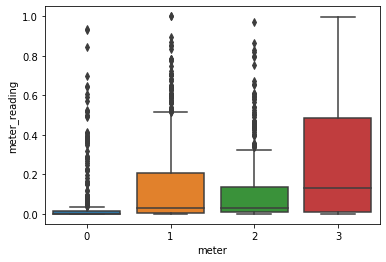

In [10]:
#make boxplot by meter type
sns.boxplot(data=g,x='meter', y='meter_reading')

In [11]:
g[(g.meter_reading>0.4) & (g.meter == 0)].count()

building_id      18
meter            18
meter_reading    18
dtype: int64

In [12]:
x = g[(g.meter_reading>0.3) & (g.meter == 0)]

In [13]:
elect_meters = x.building_id
elect_meters

0          0
1          1
2          2
3          3
4          4
        ... 
1840    1221
1896    1241
1964    1264
2179    1345
2377    1446
Name: building_id, Length: 120, dtype: int64

can remove all of these

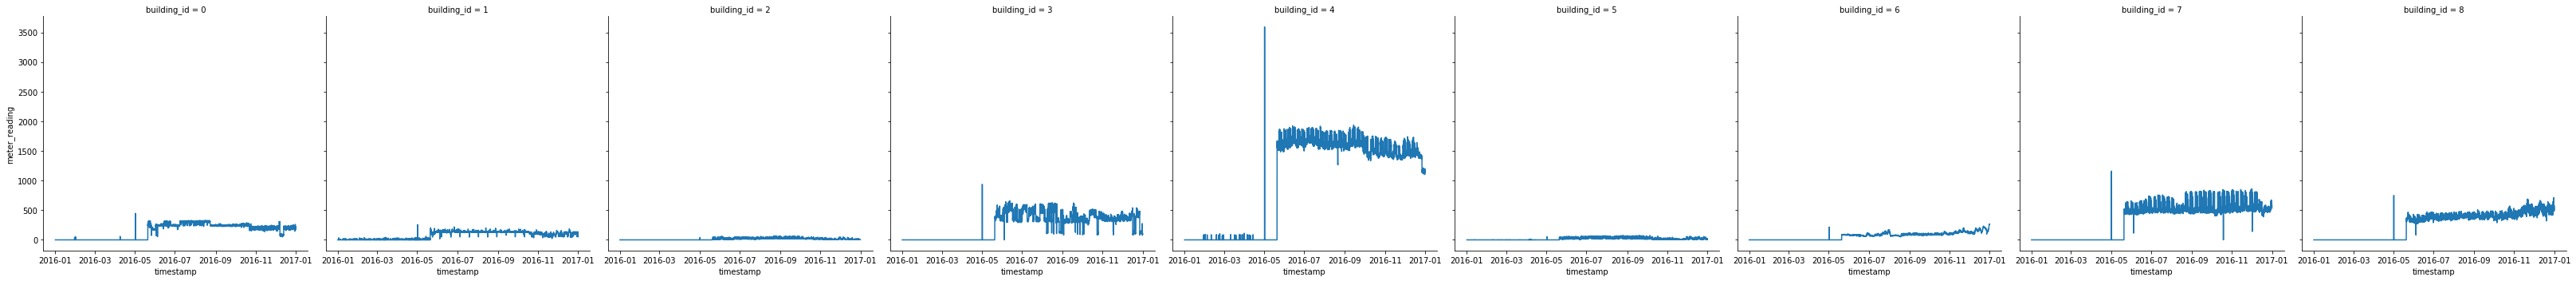

In [14]:
x=combDF[(combDF.building_id.isin(elect_meters[0:9])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

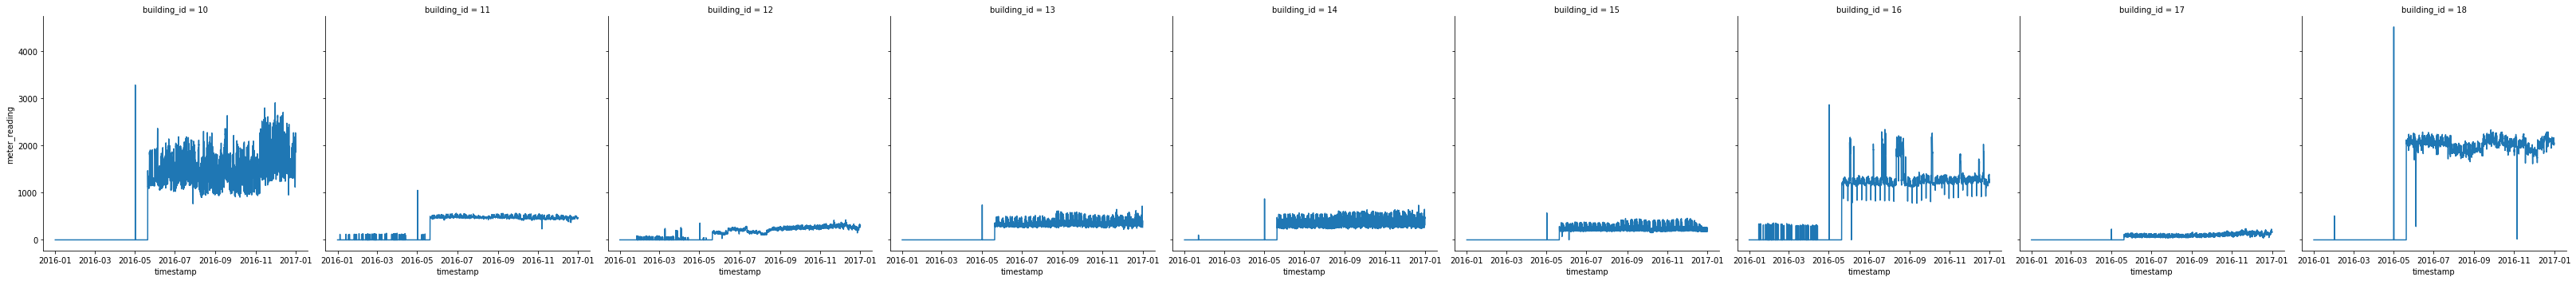

In [15]:
x=combDF[(combDF.building_id.isin(elect_meters[10:19])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

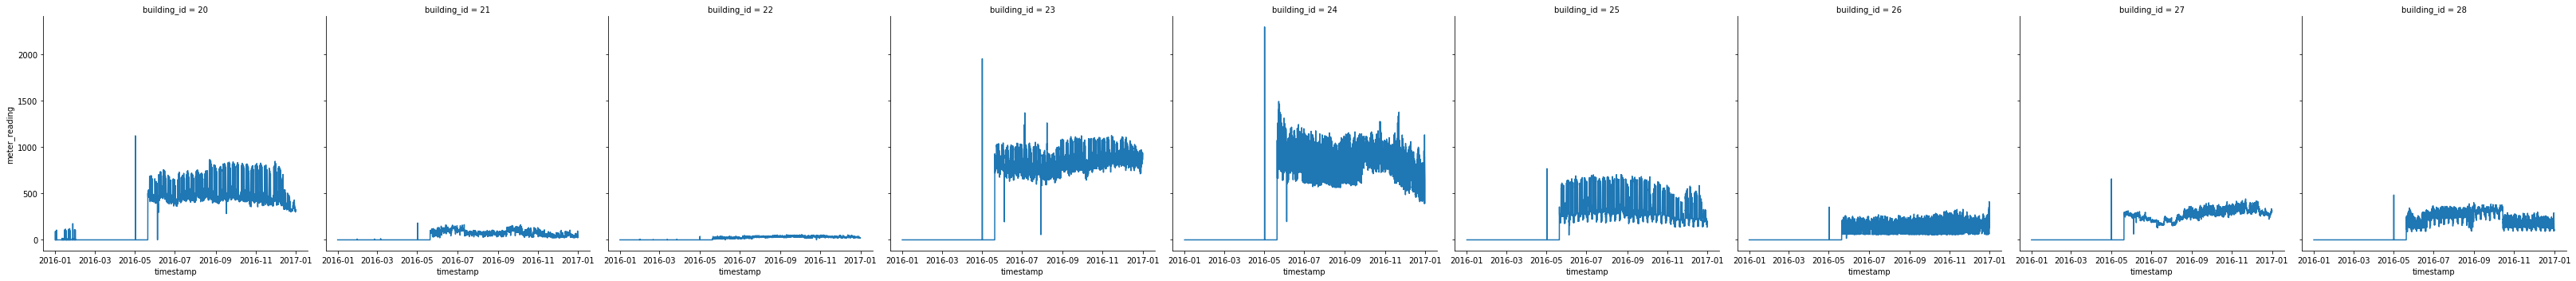

In [16]:
x=combDF[(combDF.building_id.isin(elect_meters[20:29])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

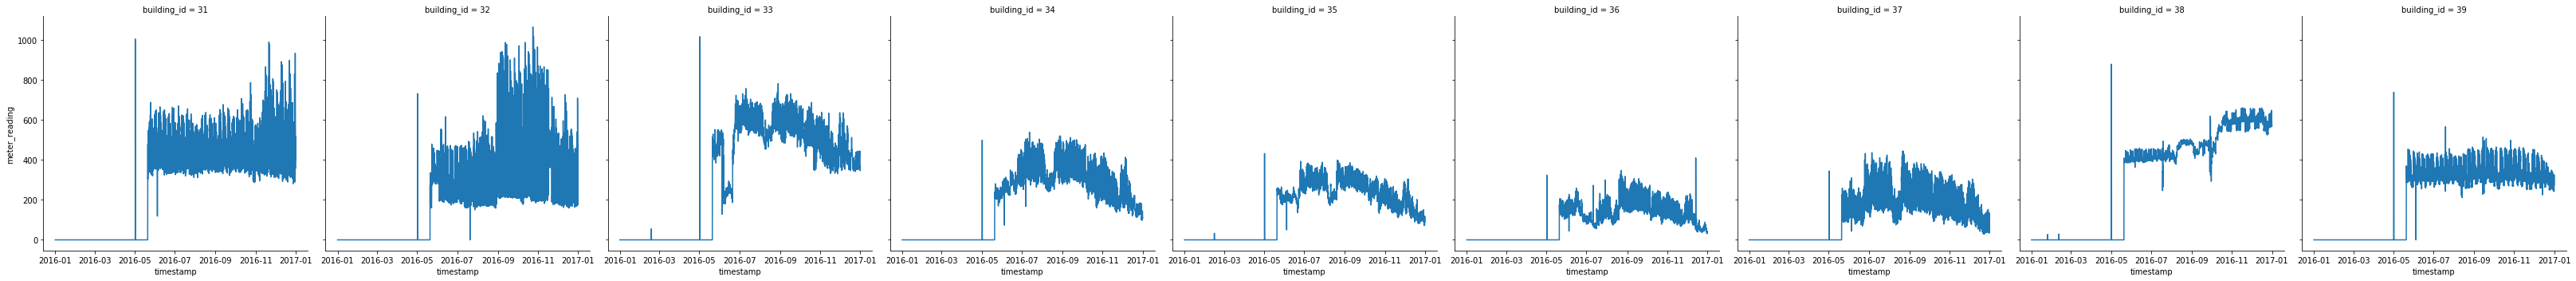

In [17]:
x=combDF[(combDF.building_id.isin(elect_meters[30:39])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

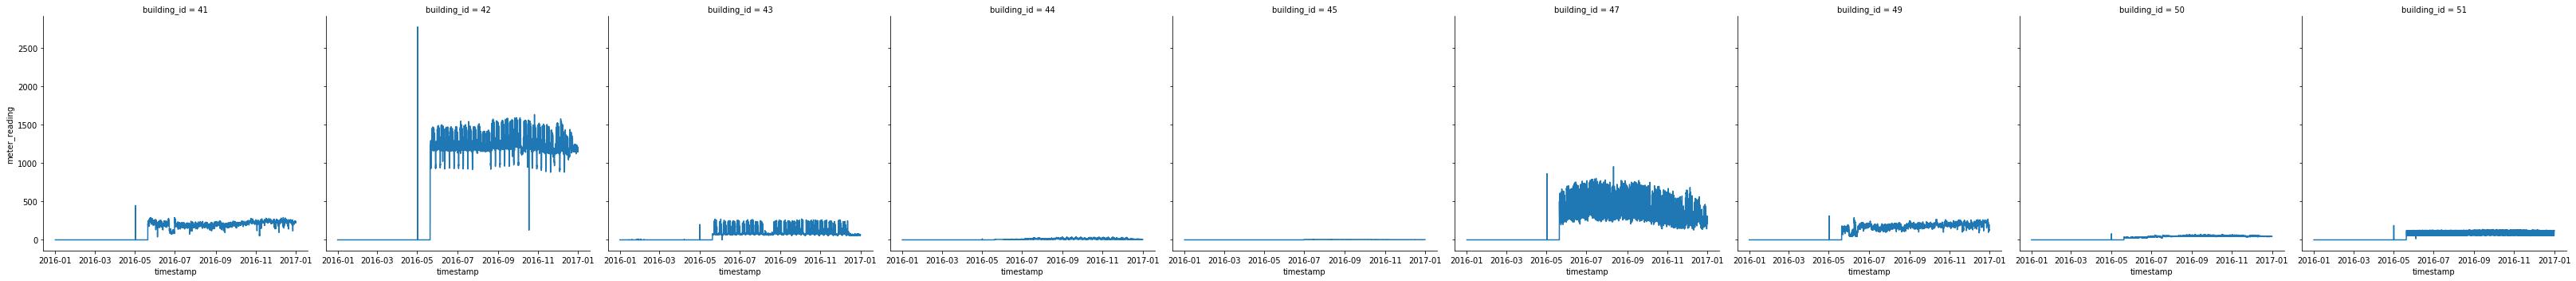

In [18]:
x=combDF[(combDF.building_id.isin(elect_meters[40:49])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

In [19]:
h = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
h.describe()
#do boxplot

,building_id,meter,meter_reading
count,2380.000000,2380.000000,2380.000000
mean,807.582353,0.664286,0.092066
std,429.858323,0.928002,0.184519
min,0.000000,0.000000,0.000000
25%,404.750000,0.000000,0.000000
50%,900.000000,0.000000,0.005254
75%,1194.250000,1.000000,0.057907
max,1448.000000,3.000000,0.999886


In [20]:
h[(h.meter_reading>0.1) & (h.meter == 0) & (h.meter_reading<0.2)].count()

building_id      9
meter            9
meter_reading    9
dtype: int64

In [21]:
y = h[(h.meter_reading>0.2) & (h.meter == 0) & (h.meter_reading<0.3)]

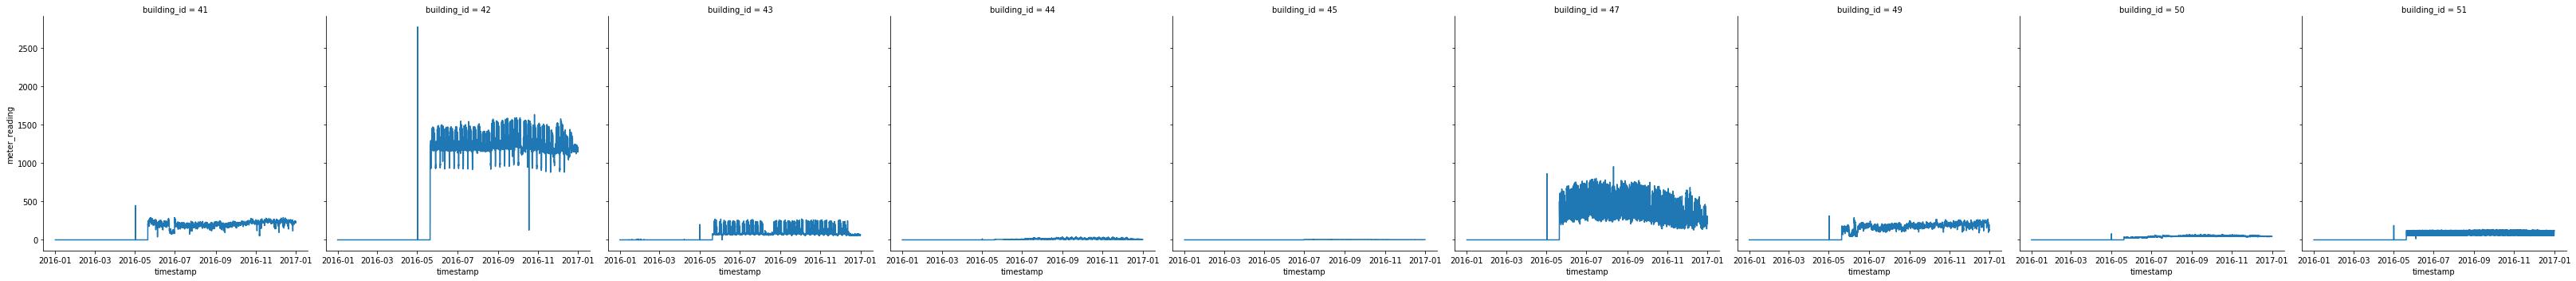

In [22]:
y=combDF[(combDF.building_id.isin(elect_meters[0:4])) & (combDF.meter == 0)]

j = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

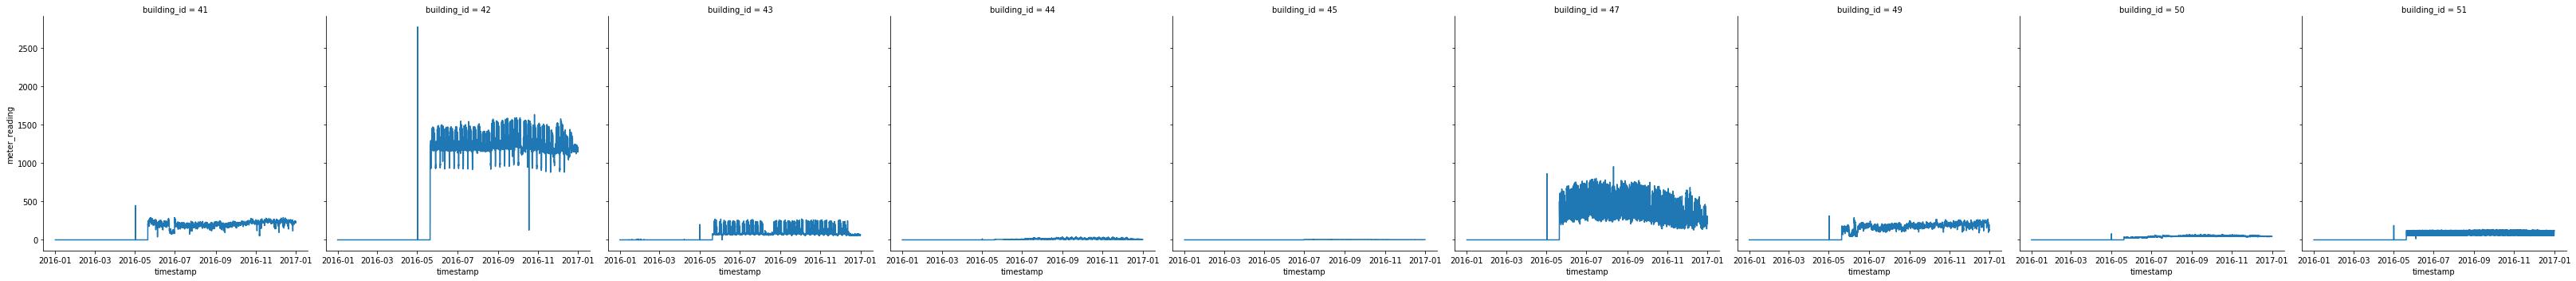

In [23]:
y=combDF[(combDF.building_id.isin(elect_meters[5:9])) & (combDF.meter == 0)]

j = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

can remove up to .20

In [24]:
h[(h.meter_reading>0.2) & (h.meter == 0)].count()

building_id      131
meter            131
meter_reading    131
dtype: int64

In [25]:
too_low_electricity_iter1 = h[(h.meter_reading>0.2) & (h.meter == 0)][['building_id','meter']]
too_low_electricity_iter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 2377
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   building_id  131 non-null    int64
 1   meter        131 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB


In [37]:
too_low_electricity_iter1.to_csv("../data_cleaning/too_low_electricity_iter1.csv", index = False)